# Module 4 Assignment

A few things you should keep in mind when working on assignments:

1. Run the first code cell to import modules needed by this assignment before proceeding to problems.
2. Make sure you fill in any place that says `# YOUR CODE HERE`. Do not write your answer anywhere else other than where it says `# YOUR CODE HERE`. Anything you write elsewhere will be removed or overwritten by the autograder.
3. Each problem has an autograder cell below the answer cell. Run the autograder cell to check your answer. If there's anything wrong in your answer, the autograder cell will display error messages.
4. Before you submit your assignment, make sure everything runs as expected. Go to the menubar, select Kernel, and Restart & Run all. If the notebook runs through the last code cell without an error message, you've answered all problems correctly.
5. Make sure that you save your work (in the menubar, select File → Save and CheckPoint).

-----

# Run Me First!

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from nose.tools import assert_equal, assert_almost_equal, assert_true, assert_is_instance

# We do this to ignore warnings
import warnings
warnings.filterwarnings("ignore")


-----

# Prepare Breast Cancer Data

In this assignment we will use the breast cancer dataset. Before we attempt to build models, we first prepare the data.

Please run the next two code cells before proceeding to Problem 1.

-----

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#Load breast cancer dataset
df = pd.read_csv('data/breast-cancer-wisconsin.csv')
label = LabelEncoder().fit_transform(df['class'])
data = df[['clump thickness', 'uniformity cell size', 'uniformity cell shape', 'marginal adhesion', 'epithelial cell size', 'bare nuclei', 'bland chromatin', 'normal nucleoli', 'mitoses']]
d_train, d_test, l_train, l_test = train_test_split(data, label, test_size=0.3, random_state=23)
d_train.sample(2)

,clump thickness,uniformity cell size,uniformity cell shape,marginal adhesion,epithelial cell size,bare nuclei,bland chromatin,normal nucleoli,mitoses
109,8,6,4,3,5,9,3,1,1
129,2,1,1,1,2,1,3,1,1


---

# Problem 1: Perform K-Nearest Neighbors Classification

Your task for this problem is to build and use the scikit learn library's `KNeighborsClassifier` estimator to make predictions on the breast cancer dataset. 

To complete this function, you must explicitly:
- Create a `KNeighborsClassifier` estimator **knn_model** by using scikit learn. Set n_neighbors to 10 and accept default values for other hyperparameter.
- Fit the `KNeighborsClassifier` estimator using d_train and l_train created above.
- Calculate the mean accuracy score of the knn_model and assign the value to variable **knn_score**.
 - Apply knn_model on d_test to get predicted value and assign it to l_pred.
 - Use `accuracy_score` function in sklearn module to calculate the mean accuracy score.

After this problem, there will be a trained K-Nearest Neighbors Classifier **knn_model** and accuracy score __knn_score__.

-----

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

### BEGIN SOLUTION
# Create and fit our K-Nearest Neighbors Classifier
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(d_train, l_train)
l_pred = knn_model.predict(d_test)
knn_score = metrics.accuracy_score(l_pred, l_test)
### END SOLUTION

In [4]:
assert_equal(type(knn_model), type(KNeighborsClassifier()), msg="knn_model is not a KNeighborsClassifier model")
assert_equal(knn_model.get_params()['n_neighbors'], 10,
            msg="n_neighbors of knn_model is not 10.")
assert_almost_equal(knn_score, 0.9853658536585366, msg="Mean accuracy score is not correct")
print(f"K-Nearest Neighbors Classifier prediction accuracy = {knn_score*100:4.1f}%")

K-Nearest Neighbors Classifier prediction accuracy = 98.5%


---

# Problem 2: Create and Train a Logistic Regression Model

Your task for this problem is to build and use the scikit learn library's `LogisticRegression` estimator to make predictions on the breast cancer dataset.  

To complete this function, you must explicitly:
- Create a `LogisticRegression` estimator **lr_model** by using scikit learn. Accept default values for all arguments.
- Fit the `LogisticRegression` estimator using d_train and l_train created in problem 1.
- Calculate the mean accuracy score of the lr_model and assign the value to variable **lr_score**.
 - Apply lr_model on d_test to get predicted value and assign it to l_pred.
 - Use `accuracy_score` function in sklearn module to calculate the mean accuracy score.

After this problem, there will be a trained logistic regression model **lr_model** and accuracy score __lr_score__.

-----

In [5]:
from sklearn.linear_model import LogisticRegression

### BEGIN SOLUTION
# Create and fit our logistic regression model to training data
lr_model = LogisticRegression()
lr_model.fit(d_train, l_train)
l_pred = lr_model.predict(d_test)
lr_score = metrics.accuracy_score(l_pred, l_test)
### END SOLUTION

In [6]:
assert_equal(type(lr_model), type(LogisticRegression()), msg="lr_model is not a LogisticRegression model")
assert_equal(lr_model.get_params()['C'], 1.0,
            msg="lr_model is not created with all default argument values")
assert_almost_equal(lr_score, 0.975609756097561, msg="Mean accuracy score is not correct")
print(f"Logistic Regression prediction accuracy = {lr_score*100:4.1f}%")

Logistic Regression prediction accuracy = 97.6%


---

# Problem 3: Create and Train a Decision Tree Classifier

Your task for this problem is to build and use the scikit learn library's `DecisionTreeClassifier` estimator to make predictions on the breast cancer dataset. 

To complete this function, you must explicitly:
- Create a `DecisionTreeClassifier` estimator **dtc_model** by using scikit learn. Set **random_state** to 23 and accept default values for all other hyperparameters.
- Fit the `DecisionTreeClassifier` estimator using d_train and l_train created in problem 1.
- Calculate the mean accuracy score of the dtc_model and assign the value to variable **dtc_score**.
 - Apply dtc_model on d_test to get predicted value and assign it to l_pred.
 - Use `accuracy_score` function in sklearn module to calculate the mean accuracy score.

After this problem, there will be a trained decision tree classification model **dtc_model** and accuracy score __dtc_score__.

-----

In [7]:
from sklearn.tree import DecisionTreeClassifier

### BEGIN SOLUTION
# Create and fit our logistic regression model to training data
dtc_model = DecisionTreeClassifier(random_state=23)
dtc_model.fit(d_train, l_train)
l_pred = dtc_model.predict(d_test)
dtc_score = metrics.accuracy_score(l_pred, l_test)
### END SOLUTION

In [8]:
assert_equal(type(dtc_model), type(DecisionTreeClassifier()), msg="dtc_model is not a DecisionTreeClassifier")
assert_equal(dtc_model.get_params()['random_state'], 23,
            msg="dtc_model is not created with random_state 23")
assert_equal(dtc_model.get_params()['criterion'], 'gini',
            msg="dtc_model is not created with all default argument values")
assert_almost_equal(dtc_score, 0.9609756097560975, msg="Mean accuracy score is not correct")
print(f"Decision Tree prediction accuracy = {dtc_score*100:4.1f}%")

Decision Tree prediction accuracy = 96.1%


---

# Problem 4: Get Confusion Matrix

For this problem, you will get the confusion matrix of the dtc_model created in problem 3.

To complete this function, you must explicitly:

- Apply dtc_model `predict` function to d_test to get predicted label, assign it to variable l_pred.
- Get the confusion matrx using `confusion_matrix` function in `metrics` module with true label **l_test** and predicted label __l_pred__.
- Assign the confusion matrix to variable **c_matrix**.

After this problem, there will be a new variable **c_matrix** defined.

-----

In [9]:
from sklearn import metrics

### BEGIN SOLUTION
l_pred = dtc_model.predict(d_test)
c_matrix = metrics.confusion_matrix(l_pred, l_test)
### END SOLUTION

In [10]:
assert_equal(c_matrix[0][0], 123, msg="Confusion matrix is not correct")
assert_equal(c_matrix[1][1], 74, msg="Confusion matrix is not correct")
print(f"Decision Tree Confusion Matrix:\n{c_matrix}")

Decision Tree Confusion Matrix:
[[123   4]
 [  4  74]]


---
# Problem 5: Prepare for ROC Curve
For this problem, you will prepare data for the ROC curve for the K-Nearest Neighbors classification model **knn_model** created in problem 1.

To complete this function, you must explicitly:
- Calculate the positive class probability of the knn_model with `predict_proba` function and assign it to variable **y_score_knn**.(Hint: the 2nd column of `predict_proba` return value is the positive probability, ie. `knn_model.predict_proba(d_test)[:, 1]`.)
- Calculate the false positive rate, true positive rate and thresholds with `roc_curve` function. Assign return values of `roc_curve` to **fpr_knn, tpr_knn** and __thresholds__.
- Get auc value with `auc` function and assign it to variable **roc_auc_knn**.

After this problem, you will have following variables defined: **y_score_knn, fpr_knn, tpr_knn, thresholds** and __roc_auc_knn__.

In [11]:
from sklearn.metrics import roc_curve, auc
### BEGIN SOLUTION
# Grab positive class probability
y_score_knn = knn_model.predict_proba(d_test)[:, 1]

# Compute ROC curve and ROC area
fpr_knn, tpr_knn, thresholds = roc_curve(l_test, y_score_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)
### END SOLUTION

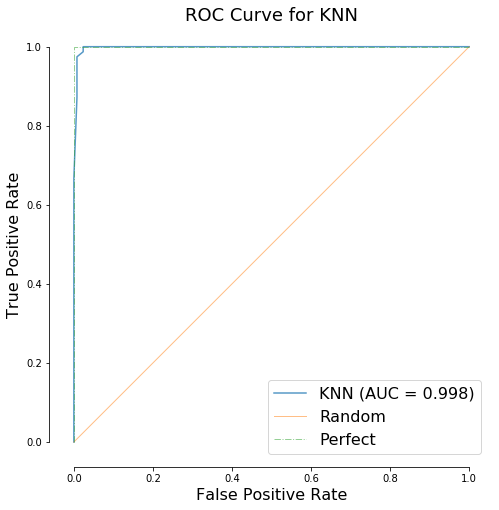

In [12]:
assert_almost_equal(fpr_knn[2], 0.007874015748031496, msg='fpr_knn is not correct')
assert_almost_equal(tpr_knn[2], 0.8717948717948718, msg='tpr_knn is not correct')
assert_almost_equal(roc_auc_knn, 0.9978800726832222, msg="auc is not correct")

#plot roc-auc curve
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 8))

# Plot data and model
ax.plot(fpr_knn, tpr_knn, alpha = 0.75, linestyle='-',
        label=f'KNN (AUC = {roc_auc_knn:4.3f})')

#plot random and perfect model ROC
ax.plot([0, 1], [0, 1], alpha = 0.5, lw=1, linestyle='-', label='Random')
ax.plot([0, 0, 1], [0, 1, 1], alpha = 0.5, lw=1, linestyle='-.', label='Perfect')

ax.set_title('ROC Curve for KNN', fontsize=18)
ax.set_xlabel('False Positive Rate', fontsize=16)
ax.set_ylabel('True Positive Rate', fontsize=16)
ax.set_xlim(-0.05, 1.05)
ax.set_ylim(-0.05, 1.05)
ax.set_aspect('equal')
ax.legend(loc=4, fontsize=16)
sns.despine(offset=5, trim=True)